# Wav2Vec2.0 no LM

In [1]:
import utils

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 0. Download LibriSpeech test-clean data

In [2]:
# from bucket
!gsutil -m -q cp -n -r gs://capstone_datasets/* ./datasets/

In [3]:
# load extracted lr data as dataset
librispeech_eval = utils.load_dataset('datasets/librispeech/test', "clean", split="test")

Resolving data files:   0%|          | 0/2707 [00:00<?, ?it/s]

Using custom data configuration test-347facd89f2630fc
Found cached dataset audiofolder (/home/jupyter/.cache/huggingface/datasets/audiofolder/test-347facd89f2630fc/0.0.0/d21214990bdb6d1fa3e71fd8d9083f8303b0c0ca6911ad366f2e988039ac58c5)


## 1. Map each audio file to its ground truth transcription

In [4]:
librispeech_eval = librispeech_eval.map(utils.map_to_ground_truth)

Loading cached processed dataset at /home/jupyter/.cache/huggingface/datasets/audiofolder/test-347facd89f2630fc/0.0.0/d21214990bdb6d1fa3e71fd8d9083f8303b0c0ca6911ad366f2e988039ac58c5/cache-0ea47cfd661948f5.arrow


## 2. Load Wav2Vec 2.0 model and tokenizer

In [5]:
tokenizer, model = utils.load_wav2vec_model("facebook/wav2vec2-base-960h")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/opt/conda/lib/python3.7/site-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:757: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  FutureWarning,
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 3. Compute prediction

In [6]:
result = librispeech_eval.map(utils.map_to_pred, fn_kwargs={"model": model, "tokenizer": tokenizer})

  0%|          | 0/2620 [00:00<?, ?ex/s]

In [8]:
print('WER with wav2vec2-base-960h on lr-test-clean:', round(100 * utils.wer(result["txt"], result["transcription"]), 1), '%.')

WER with wav2vec2-base-960h on lr-test-clean: 3.4 %.


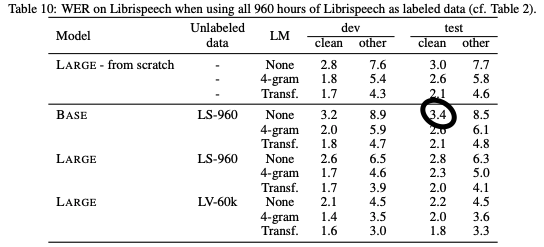

In [9]:
from IPython.display import Image
Image(filename='wav2vec2-base-960h.png')